In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os.path

folder_path = "api/data_readout"
file_type = '\*csv'
files = glob.glob(folder_path + file_type)
max_file = max(files, key=os.path.getctime)

data = pd.read_csv(max_file)
# time can go negative if time runs out, so clean data to reflect 0 = no time left
data['time'] = data['time'].apply(lambda x: 0 if x < 0 else x)
data.head()

,kills,time,health,score,movement,rotate,shoot,reward
0,0,0,100,0.000000,79,69,16,-6016
1,0,0,100,0.000000,72,73,27,-8758
2,0,0,100,0.000000,83,67,19,-6766
3,0,0,100,0.000000,90,64,11,-4766
4,1,0,100,67.435432,74,76,21,-4770


# Summary Plots
The plots below provide an overview to the models performance during the last training session. It will show a graph for the collected statistics with a graph of the score for easy viewing. Most of these are action counts, which may show correlations between certain actions resulting in a higher score.

In [50]:
plt.rcParams["figure.figsize"] = (20,5)
data.describe()

,kills,time,health,score,movement,rotate,shoot,reward
count,433.000000,433.0,433.0,433.000000,433.000000,433.000000,433.000000,433.000000
mean,0.076212,0.0,100.0,5.861520,10.491917,395.898383,2.854503,-2496.415704
std,0.374181,0.0,0.0,28.869594,25.065665,939.003934,6.779912,1433.094448
min,0.000000,0.0,100.0,0.000000,0.000000,56.000000,0.000000,-9262.000000
25%,0.000000,0.0,100.0,0.000000,0.000000,178.000000,0.000000,-2000.000000
50%,0.000000,0.0,100.0,0.000000,0.000000,178.000000,0.000000,-2000.000000
75%,0.000000,0.0,100.0,0.000000,0.000000,179.000000,0.000000,-2000.000000
max,3.000000,0.0,100.0,259.879028,90.000000,6080.000000,31.000000,1730.000000


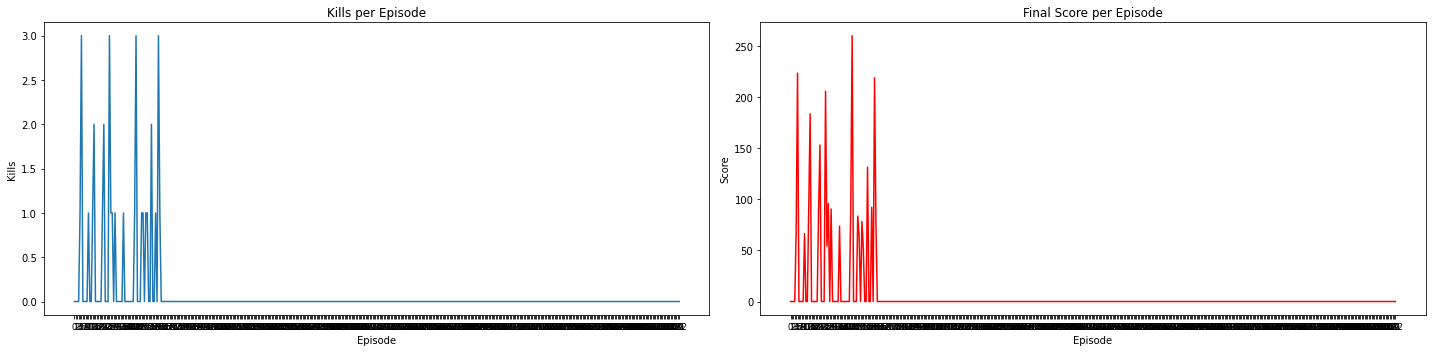

In [51]:
plt.subplot(1, 2, 1)
plt.title("Kills per Episode")
plt.xticks(range(len(data.index)), data.index, size='small')
plt.ylabel('Kills')
plt.xlabel('Episode')
plt.plot(data.index, data['kills'])

plt.subplot(1, 2, 2)
plt.title("Final Score per Episode")
plt.xticks(range(len(data.index)), data.index, size='small')
plt.ylabel('Score')
plt.xlabel('Episode')
plt.plot(data.index, data['score'], color='red')

plt.tight_layout()
plt.show()

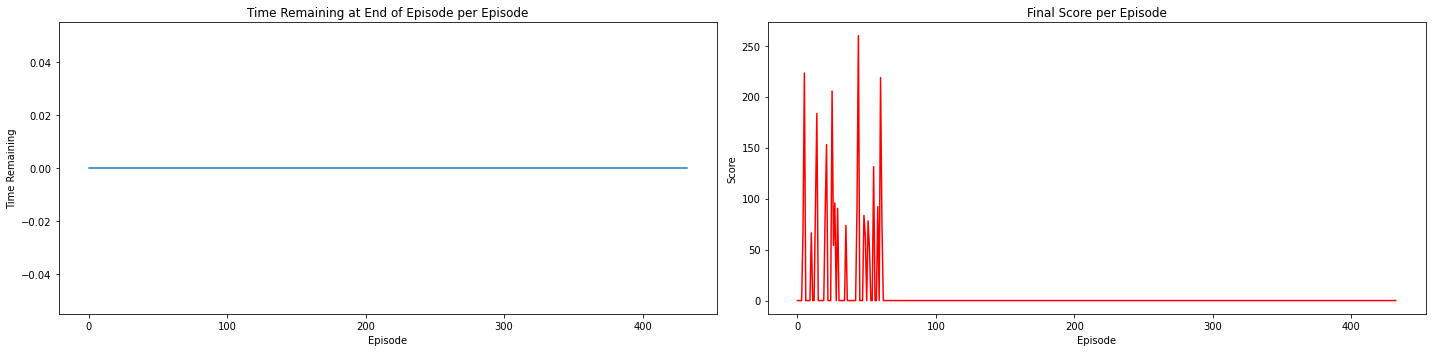

In [52]:
plt.subplot(1, 2, 1)
plt.title("Time Remaining at End of Episode per Episode")
plt.ylabel('Time Remaining')
plt.xlabel('Episode')
plt.plot(data.index, data['time'])

plt.subplot(1, 2, 2)
plt.title("Final Score per Episode")
plt.ylabel('Score')
plt.xlabel('Episode')
plt.plot(data.index, data['score'], color='red')

plt.tight_layout()
plt.show()

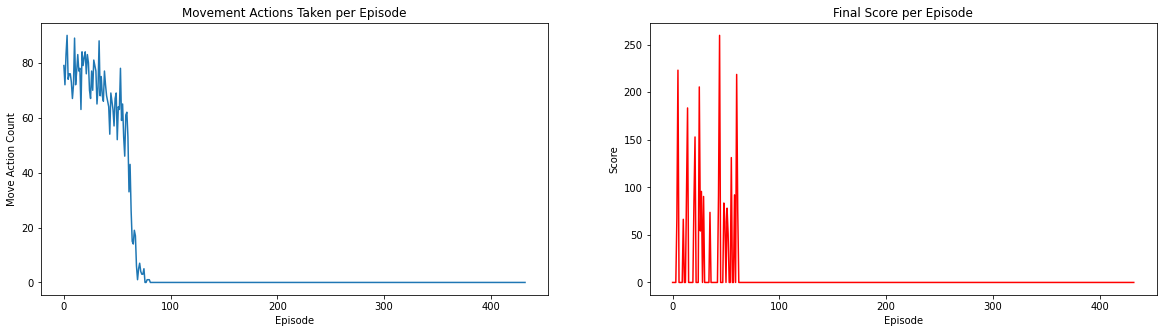

In [53]:
plt.subplot(1, 2, 1)
plt.title("Movement Actions Taken per Episode")
plt.ylabel('Move Action Count')
plt.xlabel('Episode')
plt.plot(data.index, data['movement'])

plt.subplot(1, 2, 2)
plt.title("Final Score per Episode")
plt.ylabel('Score')
plt.xlabel('Episode')
plt.plot(data.index, data['score'], color='red')

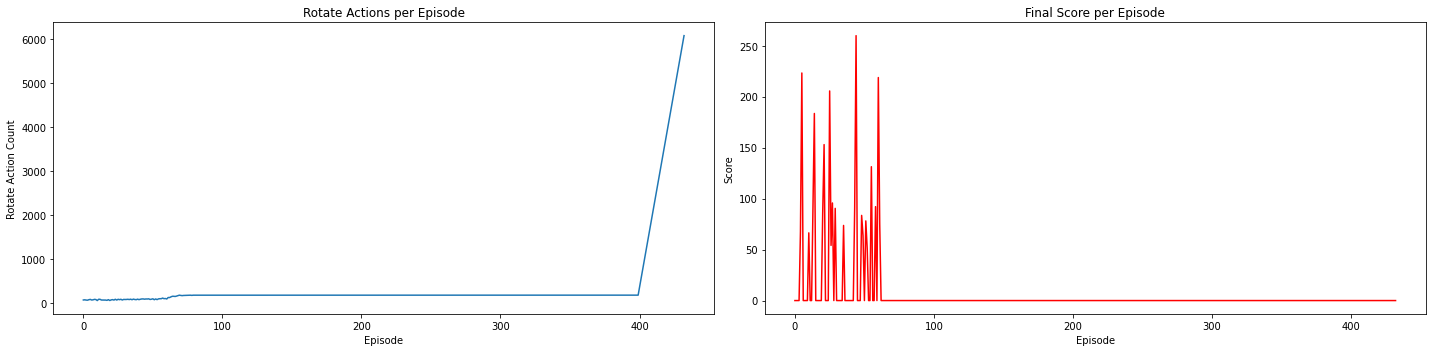

In [54]:
plt.subplot(1, 2, 1)
plt.title("Rotate Actions per Episode")
plt.ylabel('Rotate Action Count')
plt.xlabel('Episode')
plt.plot(data.index, data['rotate'])

plt.subplot(1, 2, 2)
plt.title("Final Score per Episode")
plt.ylabel('Score')
plt.xlabel('Episode')
plt.plot(data.index, data['score'], color='red')

plt.tight_layout()
plt.show()

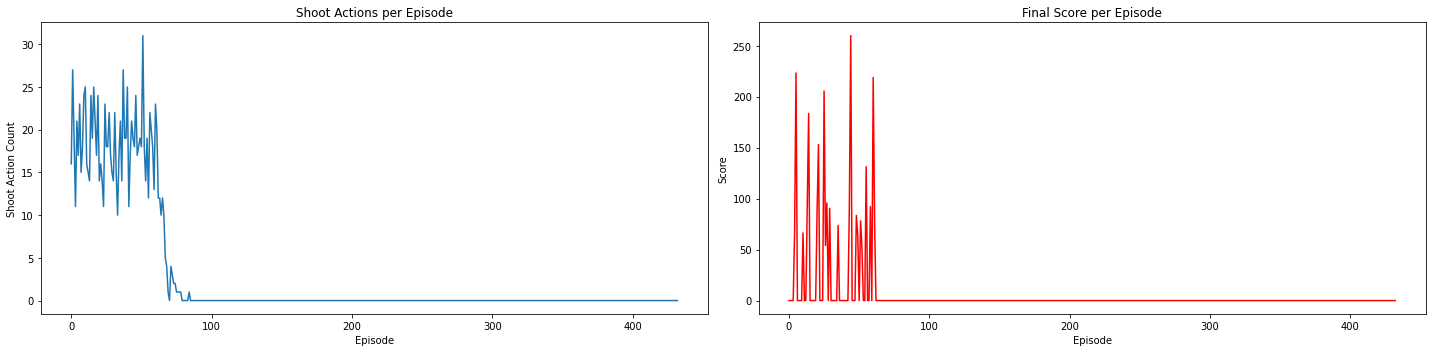

In [55]:
plt.subplot(1, 2, 1)
plt.title("Shoot Actions per Episode")
plt.ylabel('Shoot Action Count')
plt.xlabel('Episode')
plt.plot(data.index, data['shoot'])

plt.subplot(1, 2, 2)
plt.title("Final Score per Episode")
plt.ylabel('Score')
plt.xlabel('Episode')
plt.plot(data.index, data['score'], color='red')

plt.tight_layout()
plt.show()

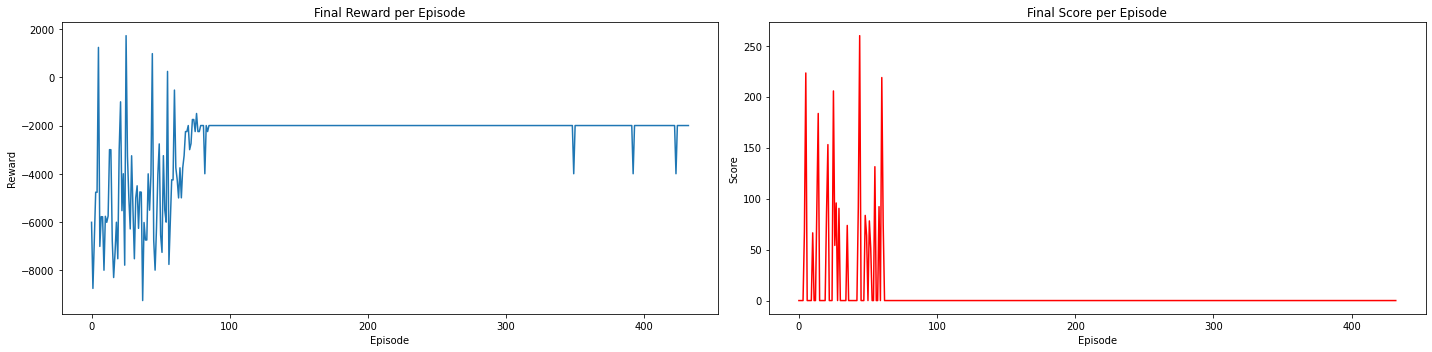

In [56]:
plt.subplot(1, 2, 1)
plt.title("Final Reward per Episode")
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.plot(data.index, data['reward'])

plt.subplot(1, 2, 2)
plt.title("Final Score per Episode")
plt.ylabel('Score')
plt.xlabel('Episode')
plt.plot(data.index, data['score'], color='red')

plt.tight_layout()
plt.show()

# Positive Score Plots
There are many episodes where no score is achieved. To better analyze the results we will isolate episodes where a score was gained and then graph it against score. This will allow us to isolate any actions that may potentially be leading to higher scores.

In [57]:
df_score = data.loc[data['score'] > 0].sort_values('score').reset_index(drop=True)
df_score.head()
print("% of episodes where score was achieved: " + str(df_score.size/data.size))

% of episodes where score was achieved: 0.050808314087759814


In [58]:
df_score.describe()

,kills,time,health,score,movement,rotate,shoot,reward
count,22.000000,22.0,22.0,22.000000,22.000000,22.000000,22.000000,22.000000
mean,1.500000,0.0,100.0,115.365375,69.318182,83.181818,19.272727,-2841.909091
std,0.801784,0.0,0.0,62.536434,12.213912,14.120692,4.222184,2358.717204
min,1.000000,0.0,100.0,51.070808,33.000000,56.000000,12.000000,-7262.000000
25%,1.000000,0.0,100.0,74.111137,64.250000,75.250000,17.250000,-4197.500000
50%,1.000000,0.0,100.0,90.864132,69.500000,82.000000,18.500000,-3252.000000
75%,2.000000,0.0,100.0,147.573395,76.750000,90.750000,21.000000,-1452.500000
max,3.000000,0.0,100.0,259.879028,89.000000,125.000000,31.000000,1730.000000


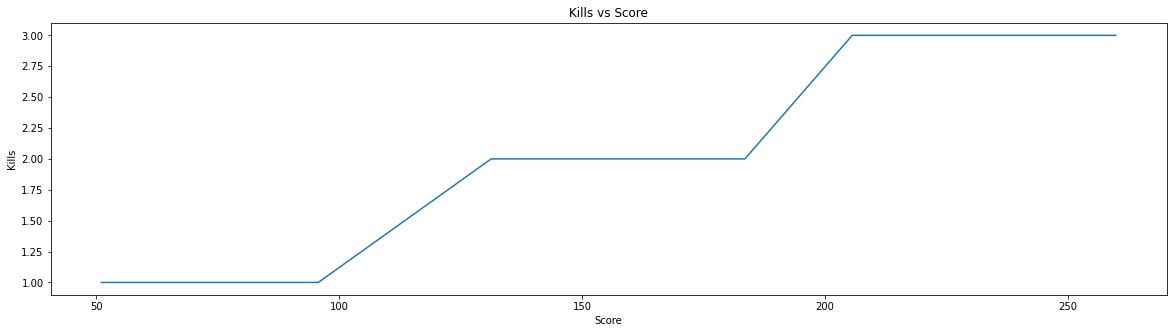

In [59]:
plt.title("Kills vs Score")
plt.ylabel('Kills')
plt.xlabel('Score')
plt.plot(df_score['score'], df_score['kills'])

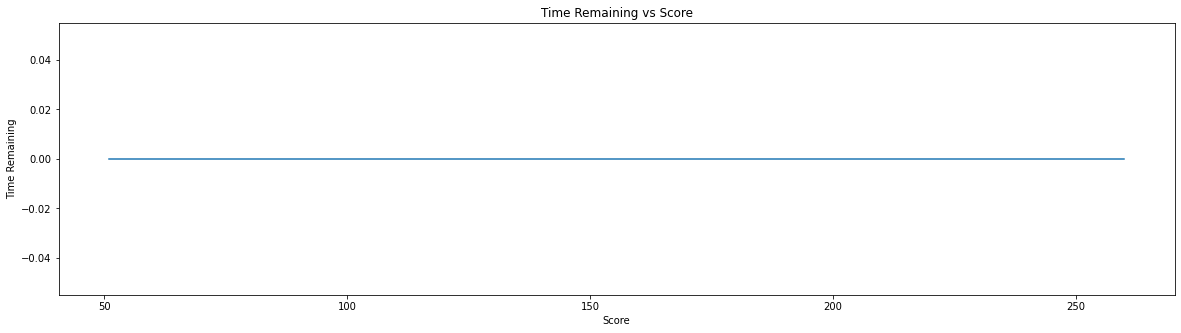

In [60]:
plt.title("Time Remaining vs Score")
plt.ylabel('Time Remaining')
plt.xlabel('Score')
plt.plot(df_score['score'], df_score['time'])

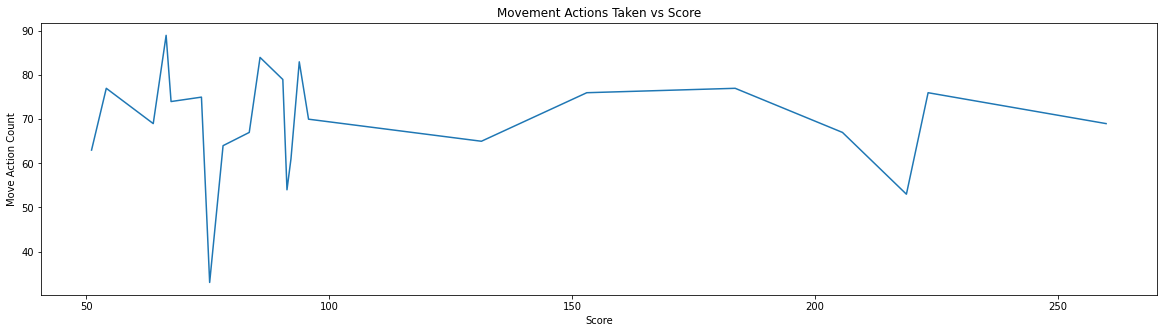

In [61]:
plt.title("Movement Actions Taken vs Score")
plt.ylabel('Move Action Count')
plt.xlabel('Score')
plt.plot(df_score['score'], df_score['movement'])

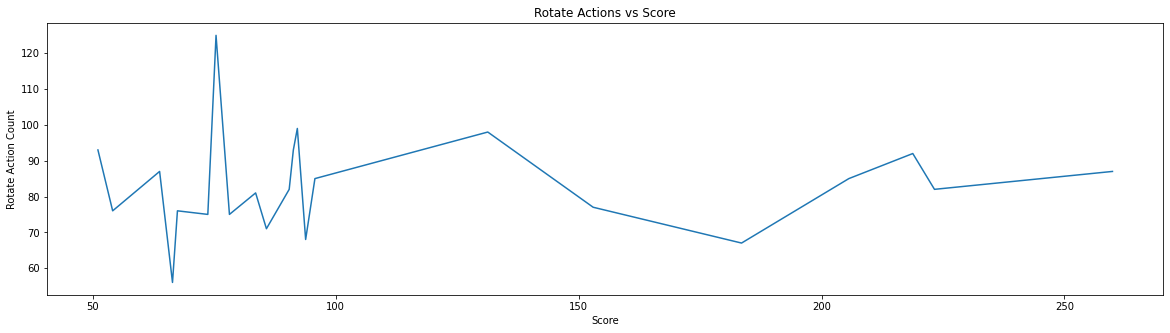

In [62]:
plt.title("Rotate Actions vs Score")
plt.ylabel('Rotate Action Count')
plt.xlabel('Score')
plt.plot(df_score['score'], df_score['rotate'])

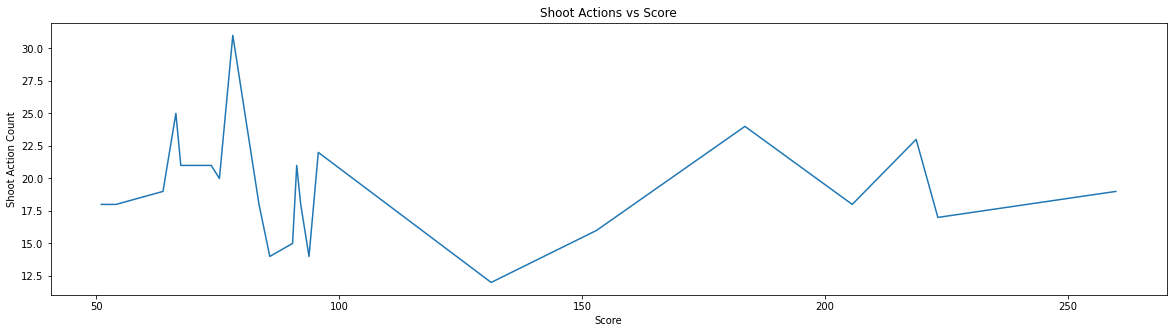

In [63]:
plt.title("Shoot Actions vs Score")
plt.ylabel('Shoot Action Count')
plt.xlabel('Score')
plt.plot(df_score['score'], df_score['shoot'])

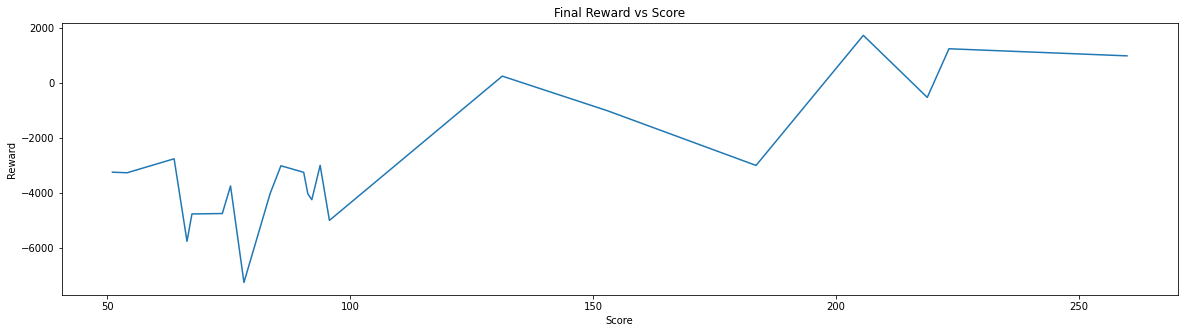

In [64]:
plt.title("Final Reward vs Score")
plt.ylabel('Reward')
plt.xlabel('Score')
plt.plot(df_score['score'], df_score['reward'])